<a href="https://colab.research.google.com/github/marco-milanesi/dynamic-weighing/blob/main/Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dynamic weighing

In [1]:
!wget https://raw.githubusercontent.com/marco-milanesi/dynamic-weighing/main/weight_data.CSV

--2021-12-02 21:21:48--  https://raw.githubusercontent.com/marco-milanesi/dynamic-weighing/main/weight_data.CSV
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 67183 (66K) [text/plain]
Saving to: ‘weight_data.CSV’

weight_data.CSV     100%[===================>]  65.61K  --.-KB/s    in 0.007s  

2021-12-02 21:21:48 (8.86 MB/s) - ‘weight_data.CSV’ saved [67183/67183]



# Linear Regression

## Import packages


In [137]:
import pandas as pd
import sklearn
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

## Loading Data

In [138]:
data = pd.read_csv('weight_data.CSV',sep=';')
print("Loaded: ",len(data))
y = data.values[:,0]
x = data.values[:,1:]
data

Loaded:  199


,Real Weight,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20,t21,t22,t23,t24,t25,t26,t27,t28
0,30,20.216734,20.591473,20.862815,21.082876,21.961170,23.008404,23.845369,25.852810,26.715498,28.738822,30.448866,30.165725,30.183971,28.252478,27.310475,25.953428,24.757809,24.057983,22.055484,20.114541,18.020647,17.390114,16.260420,14.431770,13.011104,11.320964,9.454773,8.205822
1,30,16.358580,17.948475,18.922227,19.341220,21.115006,22.996339,24.455895,26.089258,26.648218,28.489740,30.408361,30.405284,30.645241,29.286754,27.523205,25.633204,24.104316,23.409304,21.381818,21.141492,21.090736,20.030618,19.561854,17.596822,16.664926,14.639496,13.310592,11.921294
2,30,18.541974,19.393415,20.715872,20.794711,22.889283,24.044060,26.136841,26.822618,27.214711,28.648734,30.426228,30.811116,30.820215,30.439926,29.654349,28.919307,28.020054,25.840811,24.443338,23.255630,22.971649,21.885108,20.566558,20.156233,19.965342,17.914060,16.444254,15.250845
3,30,20.787830,21.712560,22.535063,23.615610,23.774196,24.938504,25.094124,26.149732,27.474697,29.129782,30.829622,30.343048,30.246423,29.857620,29.061254,27.445913,25.505077,25.278630,23.310526,21.513120,21.232630,20.735228,19.619537,17.569506,15.922942,14.703486,13.911107,13.233322
4,30,19.093744,20.634477,22.173730,22.392791,24.472763,25.323968,26.163234,27.975422,28.422492,28.663653,30.809908,30.392548,30.425185,28.969535,27.280572,25.419597,23.974121,23.526355,22.226838,20.443481,19.058634,17.707083,17.314882,17.232952,15.219103,13.907085,12.982010,11.025349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,75,65.469745,66.226849,66.500694,67.950649,70.017205,72.136103,73.023895,74.024775,74.558542,75.504318,75.641807,75.662575,75.874149,74.836788,74.240227,72.767795,71.826029,70.552868,70.490923,69.868137,69.693539,69.000679,67.005969,65.442489,64.641583,63.846277,63.783857,63.573616
195,75,63.816733,65.954598,65.964267,67.488364,68.382093,69.499717,71.276521,72.145537,72.694650,74.360400,75.925086,75.013339,75.349237,74.593905,72.901164,70.889756,70.762950,69.596962,69.064516,69.035449,68.610923,67.479043,66.771656,66.558410,65.700983,65.266628,64.743208,63.316108
196,75,65.786215,67.721361,69.824838,70.310168,71.307659,71.326052,72.050010,72.425910,73.954595,74.459107,75.541380,75.575889,75.091932,74.887379,73.002921,71.046006,70.949416,69.092364,67.873424,67.583285,67.507667,66.331702,65.345967,64.932141,63.734362,62.168726,60.683706,58.759285
197,75,62.688483,64.184743,65.896784,67.294109,67.385624,68.396841,70.167959,71.637006,73.780966,73.942565,75.752993,75.030943,75.166614,73.662947,72.206403,71.847554,70.725120,70.437576,70.340370,69.493374,69.205394,67.770324,67.510636,65.492426,63.440658,61.856313,61.186599,61.010450


# PCA

Total Variance in our dataset is:  5935.689993207136
The 95% variance we want to have is:  5638.905493546778

Variance explain with 2 components:  5916.892885217763
Variance explain with 5 components:  5929.4216968538985
Variance explain with 10 components:  5933.173193426368
Variance explain with 12 components:  5933.711679924072
Variance explain with 18 components:  5934.794241771246
Variance explain with 20 components:  5935.039445384799
Variance explain with 28 components:  5935.689993207136


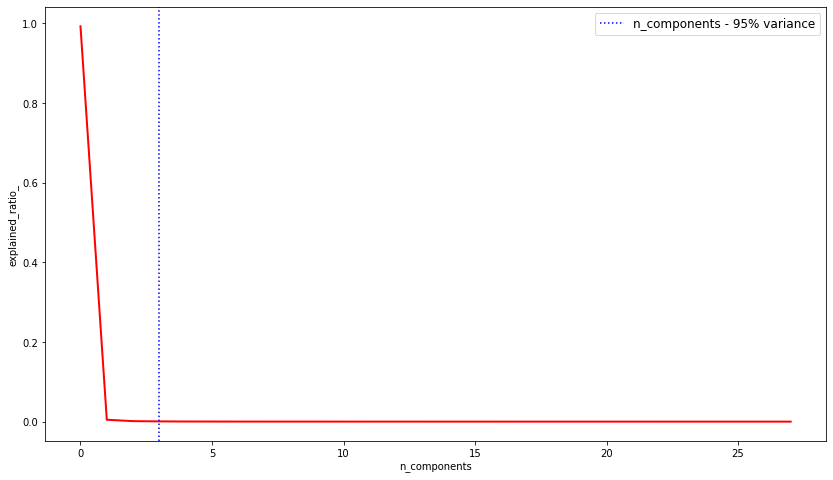

In [140]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

n_components = x.shape[1]

pca = PCA(n_components=n_components, random_state=453)
x_r = pca.fit(x).transform(x)

total_variance = sum(pca.explained_variance_)
print("Total Variance in our dataset is: ",total_variance)
var_95 = total_variance*0.95
print("The 95% variance we want to have is: ", var_95)
print("")

a = zip(range(0,n_components),pca.explained_variance_)
a = pd.DataFrame(a,columns=["PCA Comp", "Explained Variance"])

# Trying to hit 95 %
print("Variance explain with 2 components: ", sum(a["Explained Variance"][0:2]))
print("Variance explain with 5 components: ", sum(a["Explained Variance"][0:5]))
print("Variance explain with 10 components: ", sum(a["Explained Variance"][0:10]))
print("Variance explain with 12 components: ", sum(a["Explained Variance"][0:12]))
print("Variance explain with 18 components: ", sum(a["Explained Variance"][0:18]))
print("Variance explain with 20 components: ", sum(a["Explained Variance"][0:20]))
print("Variance explain with 28 components: ", sum(a["Explained Variance"][0:28]))


# Plotting the data
plt.figure(1, figsize=(14,8))
plt.plot(pca.explained_variance_ratio_,linewidth=2, c='r')
plt.xlabel('n_components')
plt.ylabel('explained_ratio_')

# Plotting line with 95 %
plt.axvline(3,linestyle=':', label='n_components - 95% variance',c = 'blue')
plt.legend(prop=dict(size=12))
plt.show()            
            
            

In [141]:
# Running PCA again

pca = PCA(n_components=3, random_state=453)
x_r = pca.fit(x).transform(x)

## Train test and split

In [128]:
from collections import Counter
print("Labels distribution:",Counter(y))

# train-test split
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x_r, y, random_state=30,train_size=0.5)
print("Train labels distribution:", Counter(y_train))
print("Test labels distribution:",Counter(y_test))




Labels distribution: Counter({70.0: 21, 35.0: 20, 40.0: 20, 45.0: 20, 50.0: 20, 55.0: 20, 60.0: 20, 75.0: 20, 30.0: 19, 65.0: 19})
Train labels distribution: Counter({60.0: 12, 75.0: 12, 40.0: 12, 30.0: 10, 70.0: 10, 35.0: 10, 45.0: 9, 55.0: 9, 65.0: 9, 50.0: 6})
Test labels distribution: Counter({50.0: 14, 70.0: 11, 45.0: 11, 55.0: 11, 65.0: 10, 35.0: 10, 30.0: 9, 60.0: 8, 40.0: 8, 75.0: 8})


In [129]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(99, 3)
(100, 3)
(99,)
(100,)


## Train the model

In [130]:
from sklearn.linear_model import LinearRegression
ml = LinearRegression()
ml.fit(x_train,y_train)

LinearRegression()

## Predict test results

In [131]:
y_pred = ml.predict(x_test)
print(y_pred)

[65.06142935 49.99131285 34.75867684 66.4647539  60.30238372 34.19951554
 59.49917532 65.67651254 59.80367855 70.08983983 44.23453747 50.03257247
 34.91256498 45.13019725 55.88450315 70.16802776 55.55623777 45.04746057
 49.76932993 69.87045741 50.02046299 64.97797248 60.07265901 39.7073278
 54.29323483 74.24544248 75.96603178 55.78095534 55.10451312 54.77829167
 65.73151735 40.05217536 35.50467042 55.66353    39.90126338 34.35786592
 29.01486382 64.89464551 75.13912565 60.55029203 60.80359641 44.91691153
 50.28812536 64.79375415 40.12758868 29.21539326 29.30866932 70.09830474
 76.18543004 31.02077648 51.1992863  29.92519958 64.89215804 74.98342299
 45.13694447 50.14696915 30.28781307 59.59941214 34.55168407 70.62280003
 30.06083779 31.02141156 74.64293725 49.3273036  40.37210605 49.94257681
 56.11020798 45.04262987 64.83750707 34.72898334 69.15506385 45.367074
 75.70528039 45.15718311 70.56602535 38.37518247 30.4209891  35.17276803
 70.69500762 49.42535829 38.97916374 45.72428187 49.22

In [132]:
coefficents = ml.coef_
coefficents

array([-0.1878143 ,  0.06290693,  0.2263811 ])

y = β0 + β1 · x1 +  β2 · x2 + ... + βn · xn

## Evaluate the model

In [133]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9983321059075497

## Plot the results

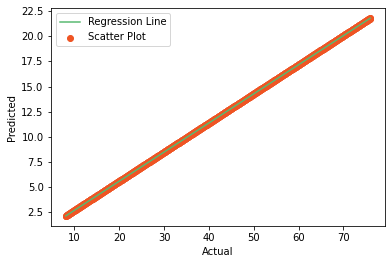

In [134]:
#plt.scatter(y_test,y_pred)
#plt.xlabel('Actual')
#plt.ylabel('Predicted')
#plt.title('Actual vs Predicted')

max_x = np.max(x)
min_x = np.min(x)

# Calculating line value x and y
x = np.linspace(min_x, max_x, 1000)
y = coefficents[0] + coefficents[1]*x + coefficents[2]*x

plt.plot(x,y, color='#58b970', label='Regression Line')
plt.scatter(x,y, c='#ef5423', label='Test Data')

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()



In [102]:
from sklearn.metrics import mean_squared_error
import math
print(mean_squared_error(y_test, y_pred))
print(math.sqrt(mean_squared_error(y_test, y_pred)))


0.15361346156859382
0.39193553241393386


In [107]:
#Example on R_Square and Adjusted R Square
import statsmodels.api as sm
X_addC = sm.add_constant(y_test)
result = sm.OLS(y_pred, X_addC).fit()
print(result.rsquared, result.rsquared_adj)


0.9992549784700377 0.999247376209528
